In [1]:
import pandas as pd
import numpy as np

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('insurance.csv')

In [107]:
print(df.shape)
print(df.head())
print(df.info())

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [108]:
df.sex.value_counts()
df.sex = df.sex.apply(lambda x : 1 if x == 'male' else 0 )

In [109]:
df.smoker.value_counts()
df.smoker = df.smoker.apply(lambda x : 1 if x == 'yes' else 0 )

In [110]:
df.region.value_counts()
def regionToVal(val):
    if val == 'southeast':
        return 1
    if val == 'southwest':
        return 1
    if val == 'northwest':
        return 1
    if val == 'northeast':
        return 1
df.region = df.region.apply(regionToVal )

In [111]:
df.describe()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


In [117]:
df.region.value_counts()

region
1    1338
Name: count, dtype: int64

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

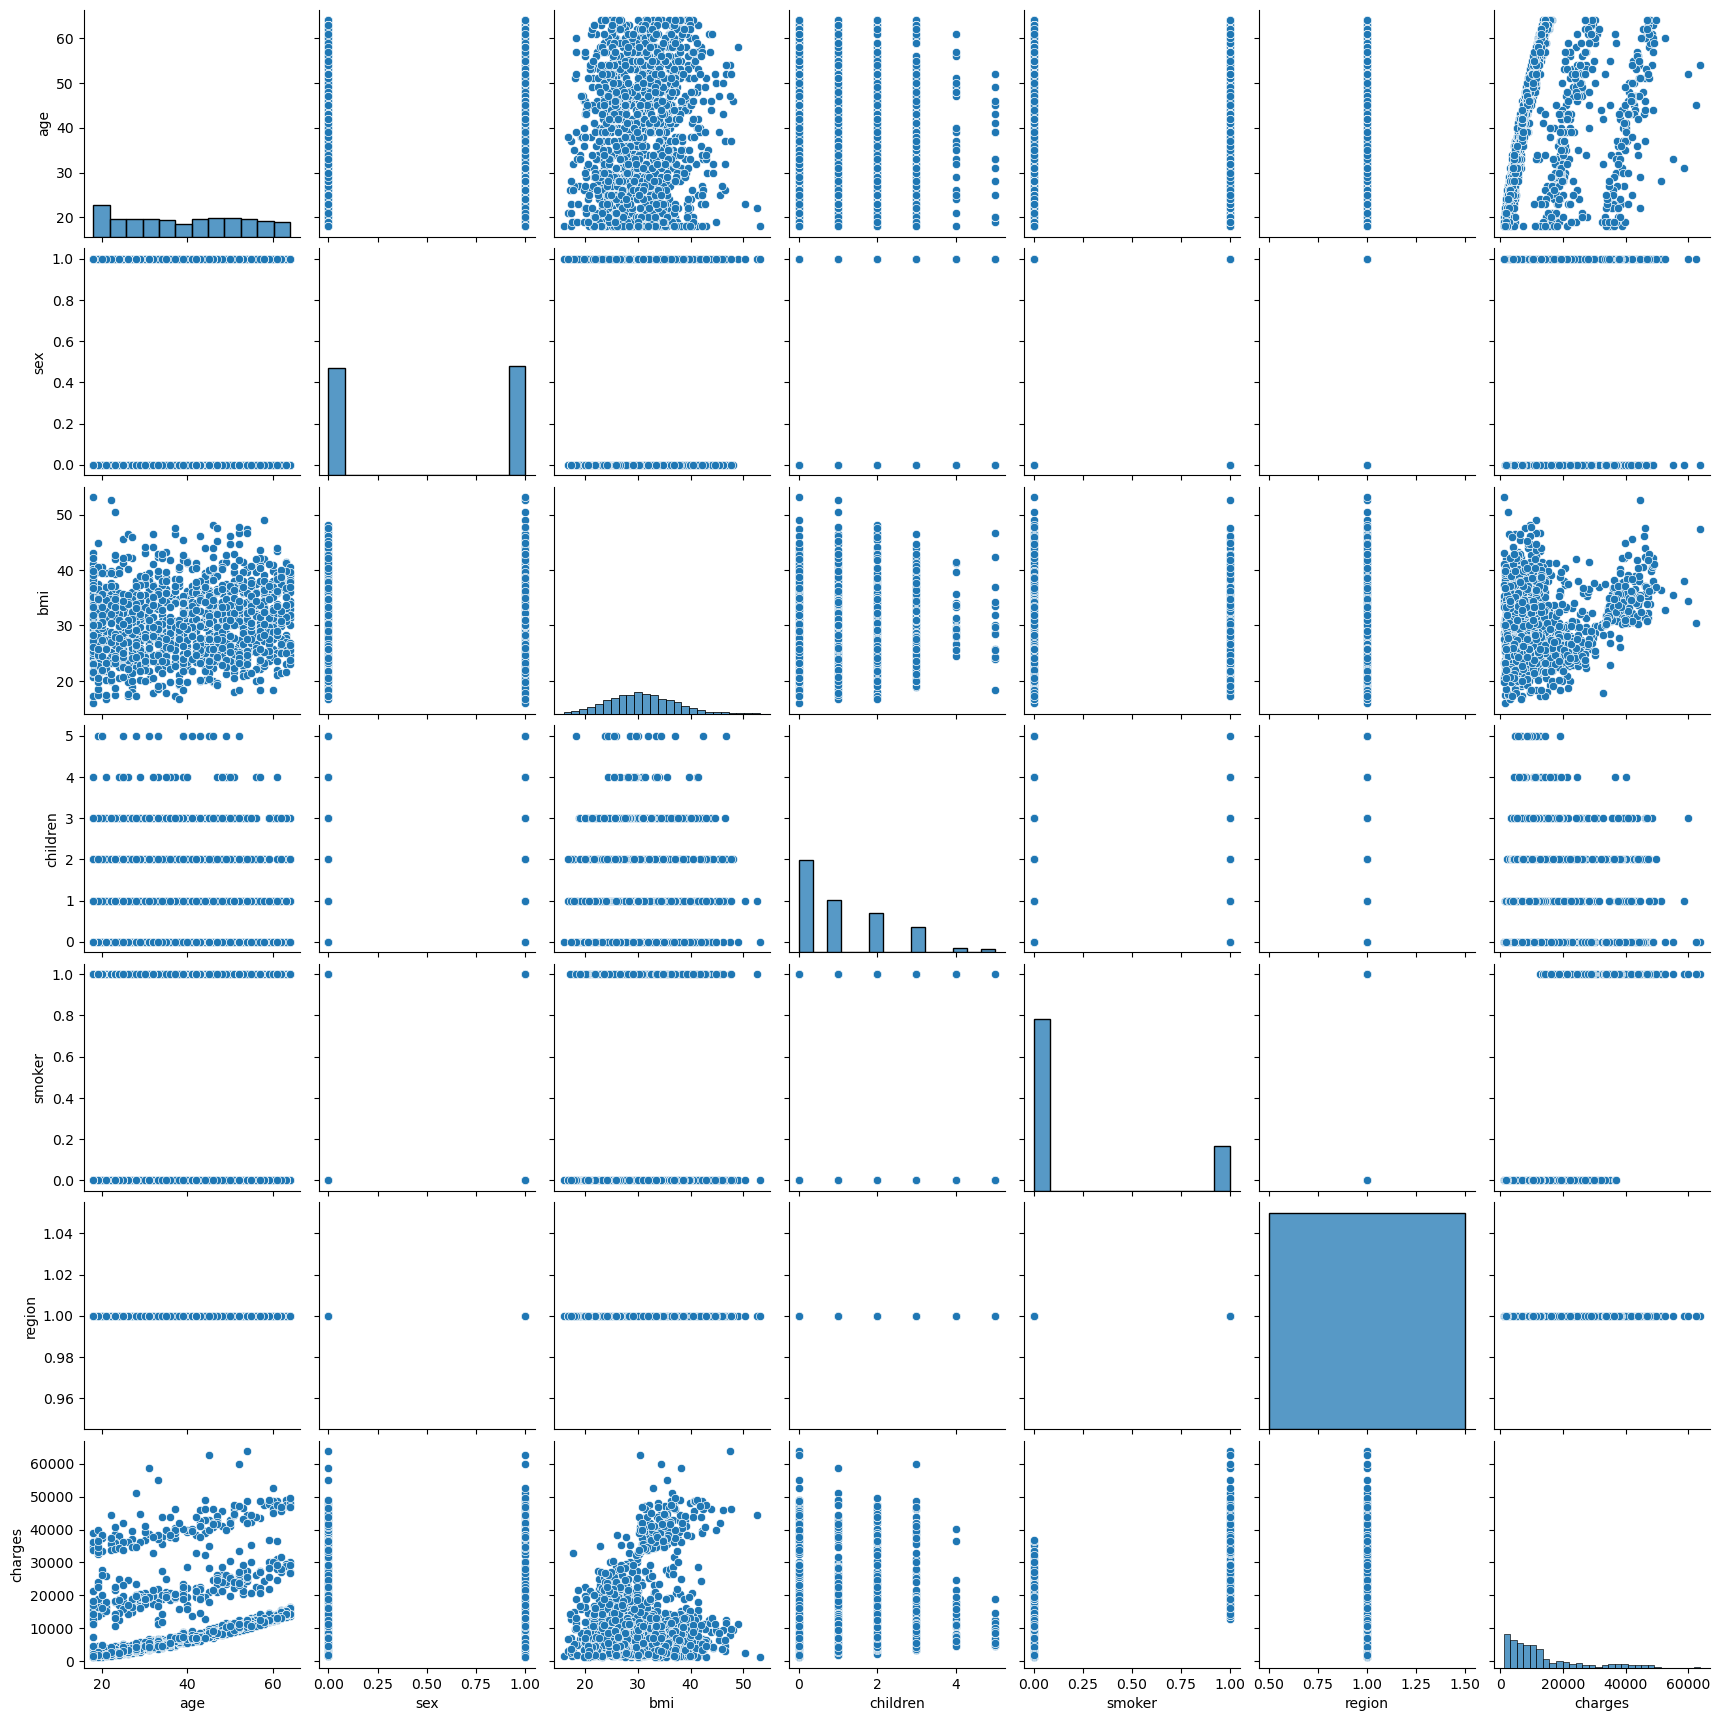

In [119]:
sns.pairplot(df)

<Axes: >

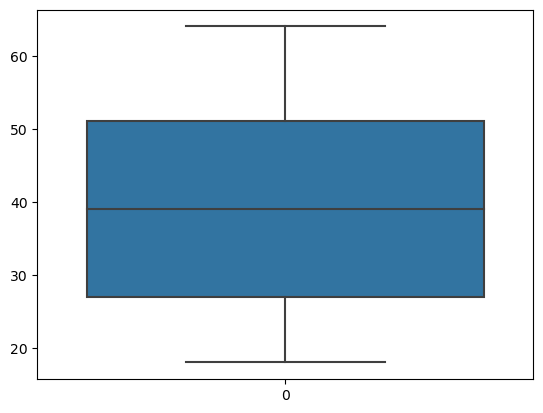

In [120]:
sns.boxplot(df.age)

<Axes: >

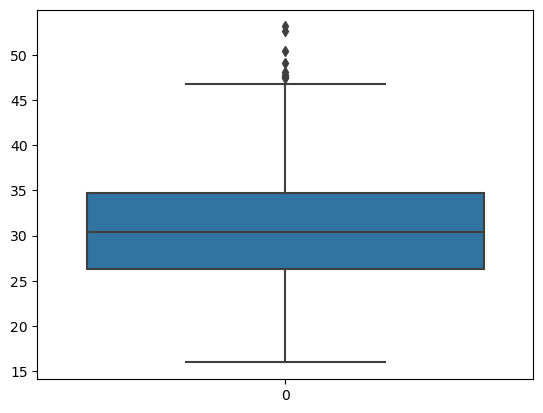

In [121]:
sns.boxplot(df.bmi)

<Axes: >

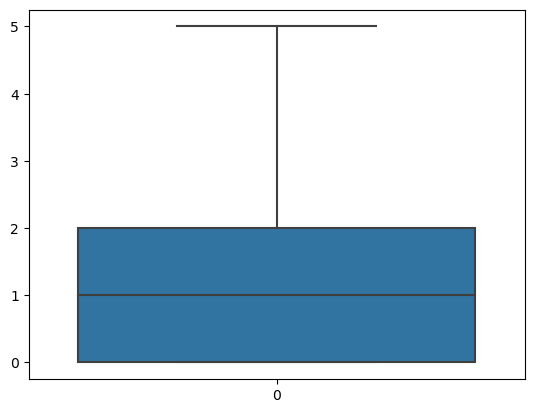

In [122]:
sns.boxplot(df.children)

<Axes: >

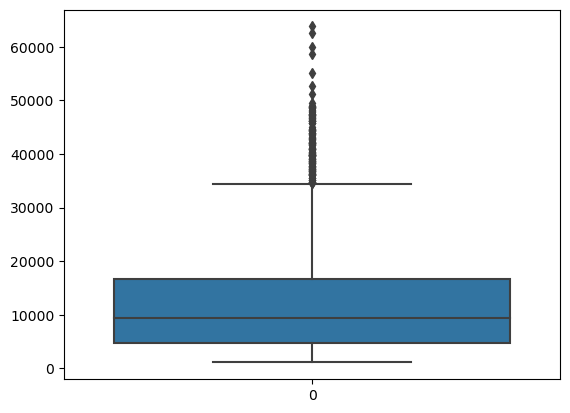

In [123]:
sns.boxplot(df.charges)

In [124]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.0,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.0,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,0.0,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.0,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.0,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.0,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,1.0,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.0,63770.428010


In [92]:
q = df['charges'].quantile(0.99)
cf = df[df['charges'] < q]
print(df.shape , "-" , cf.shape)

(1338, 7) - (1324, 7)


In [125]:
cols = ["charges"]
for col in cols:
    #print(col)
    q = df[col].quantile(0.99)
    df = df[df[col] < q]

In [126]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.0,1324.000000
mean,39.089879,0.503776,30.585400,1.097432,0.196375,1.0,12847.275434
std,14.025792,0.500175,6.067911,1.206693,0.397405,0.0,11435.272603
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.0,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.0,4710.601913
50%,39.000000,1.000000,30.275000,1.000000,0.000000,1.0,9283.021300
75%,51.000000,1.000000,34.443750,2.000000,0.000000,1.0,16073.095438
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.0,48517.563150


<Axes: >

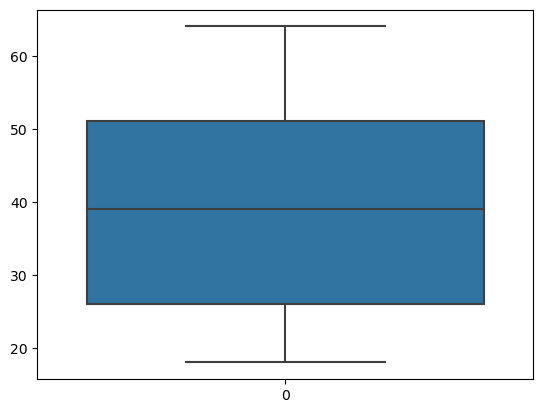

In [127]:
cols = ["age", "bmi", "children","charges"]
sns.boxplot(df["age"])

<Axes: >

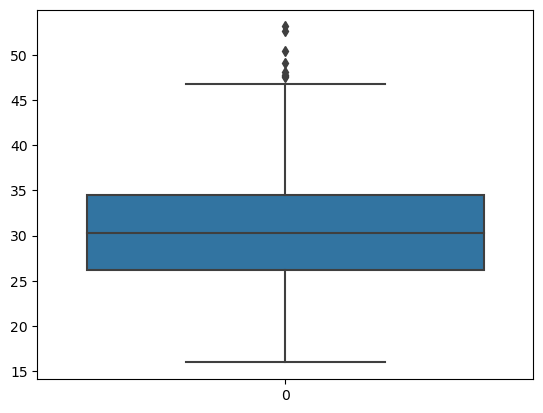

In [128]:
sns.boxplot(df["bmi"])

<Axes: >

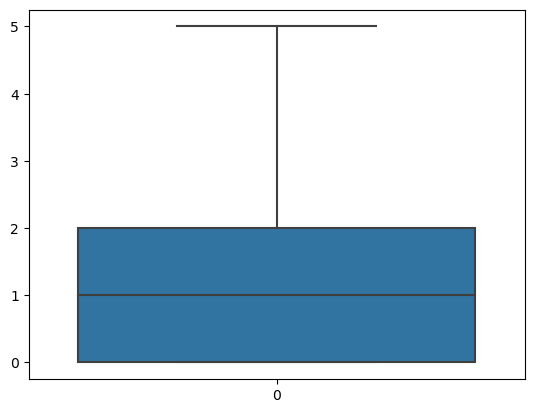

In [129]:
sns.boxplot(df["children"])

<Axes: >

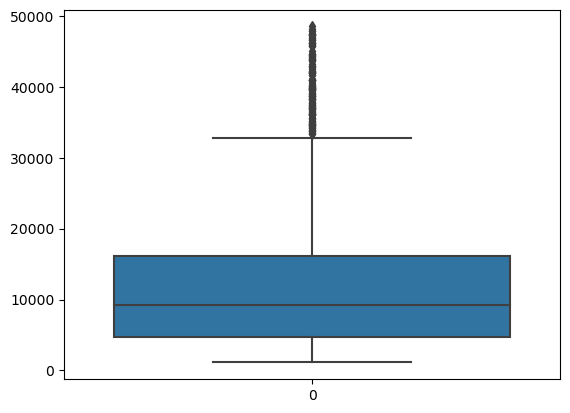

In [130]:
sns.boxplot(df["charges"])

In [131]:
df.smoker.value_counts()

smoker
0    1064
1     260
Name: count, dtype: int64

               age       sex       bmi  children    smoker  region   charges
age       1.000000 -0.026284  0.099394  0.043829 -0.042630     NaN  0.292424
sex      -0.026284  1.000000  0.045160  0.013792  0.072319     NaN  0.052171
bmi       0.099394  0.045160  1.000000  0.015470 -0.022143     NaN  0.168340
children  0.043829  0.013792  0.015470  1.000000  0.012086     NaN  0.080467
smoker   -0.042630  0.072319 -0.022143  0.012086  1.000000     NaN  0.780974
region         NaN       NaN       NaN       NaN       NaN     NaN       NaN
charges   0.292424  0.052171  0.168340  0.080467  0.780974     NaN  1.000000


<Axes: >

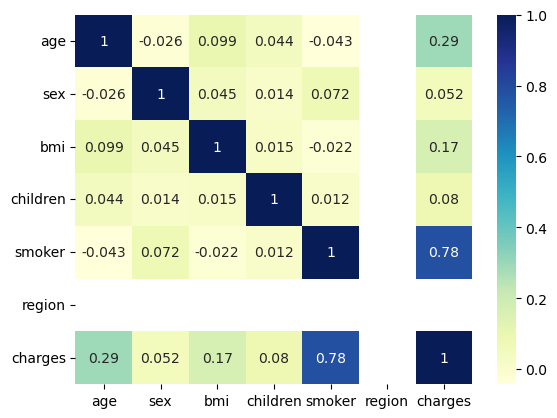

In [135]:
print(df.corr())
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

In [145]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [141]:
X = df.drop('charges',axis=1)
y = df.charges

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=100)

In [158]:
print(X_train.shape)
print(y_train.shape)

(397, 6)
(397,)


In [148]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [150]:
print(lm.coef_)

[  245.44037157   105.14727137   268.60786174   641.01115313
 24150.53505053     0.        ]


In [151]:
y_train_predict = lm.predict(X_train)

In [152]:
res = y_train - y_train_predict

ValueError: x and y must be the same size

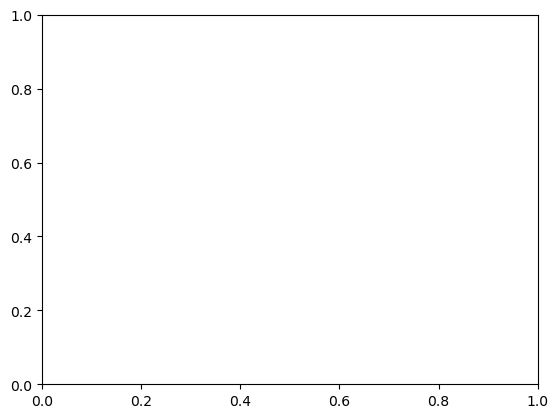

In [155]:
plt.scatter(X_train, y_train)